In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.nn import Module, Linear, Dropout, Sequential, CrossEntropyLoss

from util import load_MNIST

In [2]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device="cpu"

In [3]:
batch_size = 512
train_dataset, test_dataset, train_dataloader, test_dataloader, classes = load_MNIST(batch_size, classes=[1,4])

In [4]:
class classifer_1a4(Module):
    def __init__(self):
        super().__init__()

        self.NN = Sequential(Linear(32*32, 32*64, device=device),
        Linear(32*64, 32*64, device=device),
        Linear(32*64, 32*16, device=device),
        Linear(32*16, 32*1, device=device),
        Linear(32*1, 2, device=device))

    def forward(self, x):
        out = self.NN(x)
        return out

In [5]:
classif = classifer_1a4()
criterion = CrossEntropyLoss()
optimizer = torch.optim.SGD(classif.parameters(), lr=1e-3)

for epoch in range(20):
    for batch in train_dataloader:
        x, y = batch
        x = x.reshape(-1, 32*32).to(device)
        y = y.to(device)
        y = torch.where(y == 1, 1, 0)

        pred = classif(x)
        loss = criterion(pred, y)

        loss.backward()
        optimizer.step()
        #print(loss.item())
    

0.7044001221656799
0.7000398635864258
0.6897574663162231
0.6872135400772095
0.6751740574836731
0.6633913516998291
0.6540848016738892
0.642734944820404
0.6304776668548584
0.6178670525550842
0.58872389793396
0.5956690311431885
0.5796575546264648
0.5733005404472351
0.5576050281524658
0.5453131198883057
0.5183115005493164
0.5025197863578796
0.4959022104740143
0.4612029492855072
0.4529377818107605
0.4340168237686157
0.4141278862953186
0.3820892870426178
0.330803781747818
0.324542373418808
0.29640039801597595
0.27701014280319214
0.27376788854599
0.23573456704616547
0.22772420942783356
0.2134242206811905
0.20578543841838837
0.19400955736637115
0.19588840007781982
0.15212377905845642
0.1385428011417389
0.11635460704565048
0.11582483351230621
0.10106285661458969
0.07760931551456451
0.06108367070555687
0.05989003926515579
0.05657915398478508
0.053611453622579575
0.06437023729085922
0.05258110538125038
0.050751395523548126
0.06801242381334305
0.10151930153369904
0.04811949282884598
0.040503904223

tensor([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,

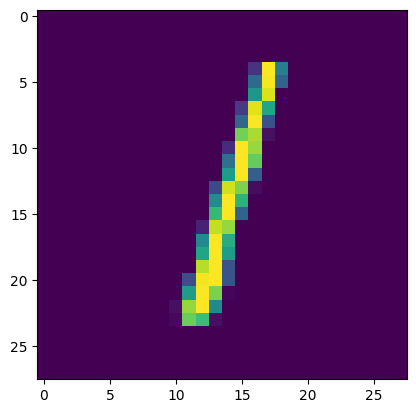

In [13]:
plt.imshow(test_dataset.data[0])
for batch in test_dataloader:
    pred = classif(batch[0].reshape(-1,32*32).to(device))
    break
print(torch.argmax(pred, dim=1))
print(batch[1])